In this demo, we'll look at performing univariate, nonlinear logistic regression using `bayesregress.fit_data`. We'll generate data according to a complicated model, and find a good fit to this data with no user supplied information about what the function should be like, and without fine-tuning any parameters to get a good fit.

Performing a logistic regression tends to take a little longer than performing a least-squares regression, due to the more difficult optimization landscape.

First we import:

In [1]:
import numpy as np
from bayesregress import fit_data
import matplotlib.pyplot as plt

Then we set a seed so that this demo is reproducible:

In [2]:
rng = np.random.default_rng(seed=1621)

Now we generate data:

In [3]:
x = np.linspace(-1, 1, 4000)
p = 1 - x**2
y = rng.random(size=x.size) < p

Next, we fit it (this takes a few seconds on my machine):

In [4]:
result = fit_data(x, y)

/home/brian/Documents/misc-code/bayesregress/bayesregress/likelihood.py:72: RuntimeWarning: overflow encountered in exp
  probs_raw = 1.0 / (1 + np.exp(-logits))
/home/brian/Documents/misc-code/bayesregress/bayesregress/likelihood.py:72: RuntimeWarning: overflow encountered in exp
  probs_raw = 1.0 / (1 + np.exp(-logits))
/home/brian/Documents/misc-code/bayesregress/bayesregress/likelihood.py:72: RuntimeWarning: overflow encountered in exp
  probs_raw = 1.0 / (1 + np.exp(-logits))
/home/brian/Documents/misc-code/bayesregress/bayesregress/likelihood.py:72: RuntimeWarning: overflow encountered in exp
  probs_raw = 1.0 / (1 + np.exp(-logits))
/home/brian/Documents/misc-code/bayesregress/bayesregress/likelihood.py:72: RuntimeWarning: overflow encountered in exp
  probs_raw = 1.0 / (1 + np.exp(-logits))
/home/brian/Documents/misc-code/bayesregress/bayesregress/likelihood.py:72: RuntimeWarning: overflow encountered in exp
  probs_raw = 1.0 / (1 + np.exp(-logits))
/home/brian/Documents/misc-c

Comparing the correct model to the fitted model shows that the fit is great:

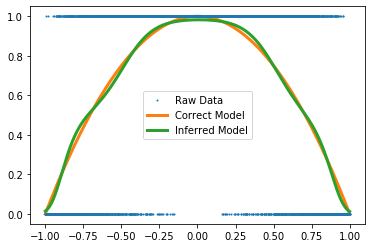

In [8]:
prediction = result.predict_for_map_model(x)

plt.plot(x, y.astype('float'), '.', label="Raw Data", ms=2, zorder=2)
plt.plot(x, p, label='Correct Model', lw=3, zorder=1)
plt.plot(x, prediction, label='Inferred Model', lw=3, zorder=1)
plt.legend(loc='center')